In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import os

In [2]:
header = ['label','rndm','weight']
# boosted frame
header += ['W_B_pt','W_B_eta','W_B_phi','W_B_E','W_B_m']
header += ['b_B_pt','b_B_eta','b_B_phi','b_B_E','b_B_m']
header += ['Wjj_B_dR','tWb_B_dR'] #dR = sqrt(phi^2 + eta^2)
header += ['Wjj_B_deta','Wjj_B_dphi','tWb_B_deta','tWb_B_dphi']
# lab frame
header += ['W_pt','W_eta','W_phi','W_E','W_m']
header += ['b_pt','b_eta','b_phi','b_E','b_m']
header += ['Wjj_dR','tWb_dR']
header += ['Wjj_deta','Wjj_dphi','tWb_deta','tWb_dphi']
header += ['t_pt','t_eta','t_phi','t_E','t_m']

header += ['btag1', 'btag2', 'btag3']

In [3]:
df = pd.read_csv('~/projects/top-reco-tests/samples/result.csv', delimiter=' ', names=header, skiprows=1)

In [4]:
pos_class = df[df['label'] == 1]
neg_class = df[df['label'] == 0]
print(neg_class.shape)
neg_class = neg_class.sample(frac=0.2)
neg_class.shape
final_df = pd.concat([neg_class, pos_class])

(13759043, 43)


In [6]:
final_df.to_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', sep=',')

In [23]:
for chunk in pd.read_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', chunksize=5):
    for row in chunk.iterrows():
        print(row)

(0, Unnamed: 0    2.520510e+06
label         0.000000e+00
rndm          8.800000e-01
weight        2.260378e-05
W_B_pt        1.433017e+01
W_B_eta       3.347328e+00
W_B_phi      -1.425400e+00
W_B_E         2.196802e+02
W_B_m         8.167825e+01
b_B_pt        1.433017e+01
b_B_eta      -3.347328e+00
b_B_phi       1.716193e+00
b_B_E         2.040876e+02
b_B_m         7.980743e+00
Wjj_B_dR      2.949280e+00
tWb_B_dR      7.395135e+00
Wjj_B_deta   -6.118236e-01
Wjj_B_dphi    2.885122e+00
tWb_B_deta    6.694656e+00
tWb_B_dphi   -3.141593e+00
W_pt          5.092603e+01
W_eta         1.984593e+00
W_phi        -2.838397e+00
W_E           2.056834e+02
W_m           8.167825e+01
b_pt          5.566954e+01
b_eta        -2.107613e+00
b_phi         2.903574e+00
b_E           2.325603e+02
b_m           7.980743e+00
Wjj_dR        2.511824e+00
tWb_dR        4.127840e+00
Wjj_deta      4.466450e-02
Wjj_dphi     -2.511427e+00
tWb_deta      4.092206e+00
tWb_dphi      5.412145e-01
t_pt          1.027242e+

KeyboardInterrupt: 

In [7]:
df = pd.read_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', delimiter=',')
df.head()

,Unnamed: 0,label,rndm,weight,W_B_pt,W_B_eta,W_B_phi,W_B_E,W_B_m,b_B_pt,...,tWb_deta,tWb_dphi,t_pt,t_eta,t_phi,t_E,t_m,btag1,btag2,btag3
0,2520510,0,0.88,0.000023,14.330167,3.347328,-1.425400,219.680227,81.678252,14.330167,...,4.092206,0.541214,102.724245,-0.415194,-3.121348,438.243632,423.767850,1.0,5.0,1.0
1,1273043,0,-0.82,-0.000012,66.450459,-1.203419,-0.388779,134.612403,59.674561,66.450459,...,-2.643688,2.564766,78.305473,0.074653,3.139745,267.438030,255.650380,1.0,1.0,1.0
2,6012520,0,-0.80,0.000021,46.572933,1.189640,-2.346657,184.410644,164.370607,46.572933,...,1.537668,0.134605,239.684110,1.859811,0.957736,833.410761,270.335153,5.0,5.0,1.0
3,1499060,0,-0.92,0.000011,55.134627,-0.070586,-0.067063,123.495591,110.436240,55.134627,...,0.042994,-2.888881,24.484248,0.695842,2.574804,181.796156,179.192965,1.0,1.0,5.0
4,4716200,0,-0.96,0.000023,75.830000,0.088819,-2.488214,222.716845,209.301511,75.830000,...,-0.918603,2.527513,47.073028,-2.847826,1.883668,506.295601,300.633925,1.0,1.0,5.0


In [8]:
y = final_df['label']
X = final_df.drop('label', axis=1).drop('rndm', axis=1)

In [10]:
pd.concat([y, X], axis=1)

,label,weight,W_B_pt,W_B_eta,W_B_phi,W_B_E,W_B_m,b_B_pt,b_B_eta,b_B_phi,...,tWb_deta,tWb_dphi,t_pt,t_eta,t_phi,t_E,t_m,btag1,btag2,btag3
2520510,0,2.260378e-05,14.330167,3.347328,-1.425400,219.680227,81.678252,14.330167,-3.347328,1.716193,...,4.092206,0.541214,102.724245,-0.415194,-3.121348,438.243632,423.767850,1.0,5.0,1.0
1273043,0,-1.247781e-05,66.450459,-1.203419,-0.388779,134.612403,59.674561,66.450459,1.203419,2.752814,...,-2.643688,2.564766,78.305473,0.074653,3.139745,267.438030,255.650380,1.0,1.0,1.0
6012520,0,2.112090e-05,46.572933,1.189640,-2.346657,184.410644,164.370607,46.572933,-1.189640,0.794936,...,1.537668,0.134605,239.684110,1.859811,0.957736,833.410761,270.335153,5.0,5.0,1.0
1499060,0,1.139680e-05,55.134627,-0.070586,-0.067063,123.495591,110.436240,55.134627,0.070586,3.074530,...,0.042994,-2.888881,24.484248,0.695842,2.574804,181.796156,179.192965,1.0,1.0,5.0
4716200,0,2.326085e-05,75.830000,0.088819,-2.488214,222.716845,209.301511,75.830000,-0.088819,0.653379,...,-0.918603,2.527513,47.073028,-2.847826,1.883668,506.295601,300.633925,1.0,1.0,5.0
1737209,0,2.042965e-05,31.975109,0.727835,2.350460,78.171775,66.664458,31.975109,-0.727835,-0.791132,...,0.731842,0.982887,124.394842,0.005401,0.688400,172.900713,120.083840,1.0,1.0,5.0
2754918,0,1.707400e-05,32.770037,1.888851,2.310647,144.671828,93.008670,32.770037,-1.888851,-0.830945,...,2.274486,-0.898887,135.642194,-0.097237,-2.306590,289.830102,255.789316,1.0,5.0,1.0
2922468,0,1.390571e-05,67.307369,-0.241569,-0.305239,95.480036,65.700882,67.307369,0.241569,2.836354,...,-0.544373,2.642455,35.427136,-0.653312,-2.227499,170.660041,165.086011,1.0,1.0,5.0
4994844,0,1.586510e-05,71.621943,2.110157,-1.953785,398.896922,263.172395,71.621943,-2.110157,1.187808,...,3.378913,-1.187888,198.008885,1.785037,0.018902,925.468637,698.897474,5.0,1.0,1.0
6319229,0,1.683772e-05,100.075170,1.015082,-3.024360,320.146350,279.446633,100.075170,-1.015082,0.117233,...,2.866022,1.645365,130.938160,2.982035,0.748160,1379.968518,477.052734,5.0,1.0,1.0


In [7]:
np.array(y == 1)

array([False, False, False, ...,  True,  True,  True])

In [8]:
#3d scatter plot before PCA

In [9]:
pca = PCA(n_components=5)
X_4 = pca.fit_transform(X)

In [10]:
print(y.shape)
X_4.shape

(2449741,)


(2449741, 5)

In [24]:
X_4 = pd.DataFrame(X_4)
pos_class = X_4.iloc[np.array(y == 1)].sample(frac=0.0001)
neg_class = X_4.iloc[np.array(y == 0)].sample(frac=0.00007)
print(pos_class.shape)
print(neg_class.shape)

(107, 5)
(96, 5)


Text(0.5, 0, 'PC3')

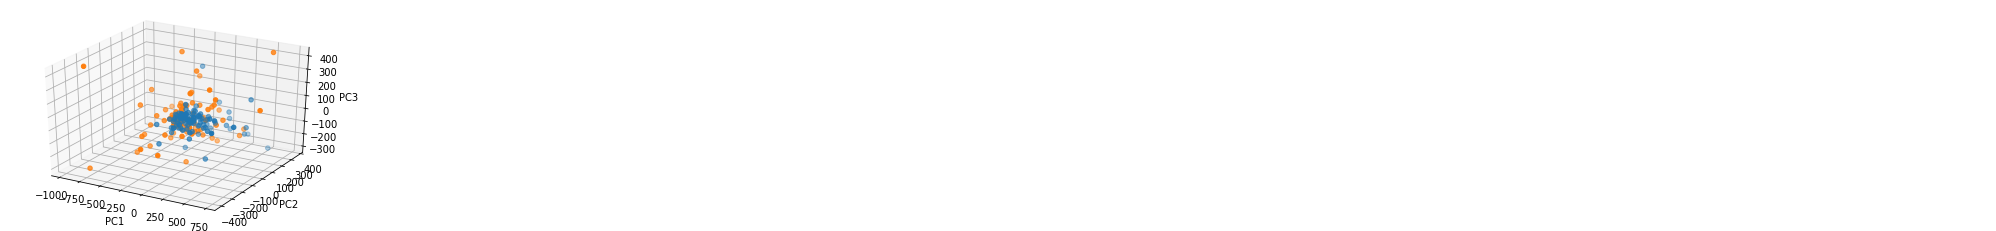

In [36]:
#3d scatter plot after PCA
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pos_class[pos_class.columns[2]], pos_class[pos_class.columns[3]], pos_class[pos_class.columns[4]], 'blue')
ax.scatter3D(neg_class[neg_class.columns[2]], neg_class[neg_class.columns[3]], neg_class[neg_class.columns[4]], 'orange')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

Text(0.09379629152477457, 0.012566320283548647, 'PC3')